In [479]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime
import time
%matplotlib inline
%config IPCompleter.greedy=True

In [481]:
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use('ggplot')

### 1.	Загрузите данные в ноутбук

In [4]:
df = pd.read_excel('вариант2.xlsx')
df.sample(5)

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
327,328.0,136.0,11,Ж,343.0,++-+++--+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,6.0,27.0,27.0
1019,1020.0,135.0,11,М,345.0,+++++-+-+++-,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,9.0,45.0,27.0
20,21.0,121.0,11,Ж,345.0,-----++-+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,3.0,14.0,27.0
758,759.0,136.0,11,Ж,347.0,++-+++--+++-,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,8.0,39.0,27.0
1568,1569.0,136.0,11,Ж,348.0,++++++--++-+,2(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,11.0,56.0,27.0


In [5]:
df.tail()

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
2352,2353.0,136.0,11,М,341.0,++-+++++++++,2(2)2(2)1(2)2(3)2(3)4(4)1(4),NaN,25.0,92.000000,27.0
2353,2354.0,136.0,11,М,341.0,++++++++++++,2(2)1(2)2(2)1(3)3(3)4(4)2(4),NaN,27.0,96.000000,27.0
2354,2355.0,136.0,11,М,343.0,++++++++++++,2(2)2(2)2(2)0(3)3(3)4(4)2(4),NaN,27.0,96.000000,27.0
2355,2356.0,136.0,11,Ж,337.0,++++++++++++,2(2)2(2)2(2)0(3)3(3)4(4)2(4),NaN,27.0,96.000000,27.0
2356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Среднее значение,NaN,49.255093,NaN


In [6]:
cols = ['id', 'school', 'form', 'sex', 'variant', 'short_answer', 'long_answer', 'delete_it', '1_score', 'final_score', 'min_possible_score']
df.columns = cols

In [7]:
df_mean_score = df.loc[2356, 'final_score']

In [8]:
df.drop(2356, axis=0, inplace=True)

In [9]:
del df['delete_it']

In [10]:
df.sample(5)

,id,school,form,sex,variant,short_answer,long_answer,1_score,final_score,min_possible_score
1171,1172.0,125.0,11,Ж,342.0,+++-++-+++++,0(2)0(2)0(2)0(3)0(3)0(4)0(4),10.0,50.0,27.0
1047,1048.0,136.0,11,М,339.0,+++++-++++--,0(2)0(2)0(2)0(3)0(3)0(4)0(4),9.0,45.0,27.0
820,821.0,136.0,11,М,344.0,+++++---+++-,0(2)0(2)0(2)0(3)0(3)0(4)0(4),8.0,39.0,27.0
1036,1037.0,136.0,11,М,346.0,++++++--+++-,0(2)0(2)0(2)0(3)0(3)0(4)0(4),9.0,45.0,27.0
581,582.0,136.0,11,М,344.0,+++++---++--,0(2)0(2)0(2)0(3)0(3)0(4)0(4),7.0,33.0,27.0


In [11]:
df.dtypes == float

id                     True
school                 True
form                  False
sex                   False
variant                True
short_answer          False
long_answer           False
1_score                True
final_score            True
min_possible_score     True
dtype: bool

In [12]:
float_types = ['id', 'school', 'variant', '1_score', 'final_score', 'min_possible_score']

In [13]:
for col in float_types:
    df[col] = df[col].astype(int)

In [14]:
df.dtypes

id                     int32
school                 int32
form                  object
sex                   object
variant                int32
short_answer          object
long_answer           object
1_score                int32
final_score            int32
min_possible_score     int32
dtype: object

In [15]:
df.head()

,id,school,form,sex,variant,short_answer,long_answer,1_score,final_score,min_possible_score
0,1,124,11,Ж,341,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),1,5,27
1,2,128,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),1,5,27
2,3,132,11,Ж,340,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),1,5,27
3,4,134,11,Ж,339,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),1,5,27
4,5,136,11,Ж,348,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),1,5,27


In [16]:
df.tail()

,id,school,form,sex,variant,short_answer,long_answer,1_score,final_score,min_possible_score
2351,2352,136,11,М,337,++++++++++++,2(2)2(2)2(2)3(3)3(3)0(4)1(4),25,92,27
2352,2353,136,11,М,341,++-+++++++++,2(2)2(2)1(2)2(3)2(3)4(4)1(4),25,92,27
2353,2354,136,11,М,341,++++++++++++,2(2)1(2)2(2)1(3)3(3)4(4)2(4),27,96,27
2354,2355,136,11,М,343,++++++++++++,2(2)2(2)2(2)0(3)3(3)4(4)2(4),27,96,27
2355,2356,136,11,Ж,337,++++++++++++,2(2)2(2)2(2)0(3)3(3)4(4)2(4),27,96,27


### 2.	Сделайте описательную статистику по среднему баллу

In [17]:
df[['1_score', 'final_score']].describe()

,1_score,final_score
count,2356.000000,2356.000000
mean,10.123939,49.255093
std,3.820484,17.880420
min,1.000000,5.000000
25%,7.000000,33.000000
50%,10.000000,50.000000
75%,13.000000,68.000000
max,27.000000,96.000000


### 3.	Найдите процент учащихся, выполнивших работу ниже среднего

In [18]:
percentage_below_average = df.loc[df.final_score < df_mean_score, 'final_score'].count() / len(df)
print('Процент учащихся, выполнивших работу ниже среднего: {:.1%}'.format(percentage_below_average))

Процент учащихся, выполнивших работу ниже среднего: 48.0%


### 4.	Найти процент учащихся, не сдавших экзамен

In [19]:
not_passed = df.loc[df.final_score < 27, 'final_score'].count() / len(df)
print('Процент учащихся, не сдавших экзамен: {:.1%}'.format(not_passed))

Процент учащихся, не сдавших экзамен: 9.2%


### 5.	Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен

In [21]:
def passed(row):
    
    if row.final_score < 27:
        return 'failed'
    if row.final_score >= 27:
        return 'passed'

df['status'] = df.apply(passed, axis=1)

In [22]:
df.sample(5)

,id,school,form,sex,variant,short_answer,long_answer,1_score,final_score,min_possible_score,status
1983,1984,136,11,Ж,343,++++++--++++,2(2)0(2)2(2)0(3)0(3)0(4)0(4),14,70,27,passed
686,687,128,11,Ж,344,++++++--+-+-,0(2)0(2)0(2)0(3)0(3)0(4)0(4),8,39,27,passed
1252,1253,133,11,М,341,++++++-++++-,0(2)0(2)0(2)0(3)0(3)0(4)0(4),10,50,27,passed
1009,1010,135,11,Ж,338,+-++++--++++,0(2)0(2)0(2)0(3)0(3)0(4)0(4),9,45,27,passed
278,279,133,11,Ж,340,+++++---+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),6,27,27,passed


In [23]:
df.head()

,id,school,form,sex,variant,short_answer,long_answer,1_score,final_score,min_possible_score,status
0,1,124,11,Ж,341,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),1,5,27,failed
1,2,128,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),1,5,27,failed
2,3,132,11,Ж,340,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),1,5,27,failed
3,4,134,11,Ж,339,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),1,5,27,failed
4,5,136,11,Ж,348,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),1,5,27,failed


In [31]:
status_report = df.groupby('status').count()['final_score']

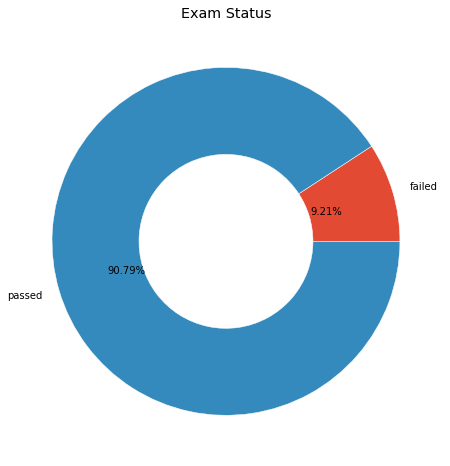

In [61]:
status_report.plot(kind='pie', wedgeprops=dict(width=0.5, edgecolor='w'), autopct='%.2f%%', fontsize=10)
plt.title('Exam Status')
plt.ylabel('')
plt.show()

### 6.	Постройте гистограмму по распределению баллов за экзамен. Соответствует ли оно нормальному распределению?

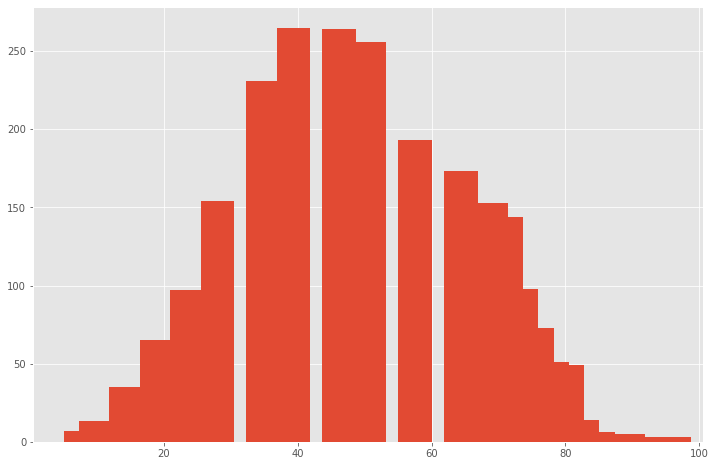

In [73]:
df.final_score.hist(bins=40, width = 5);

Распределение в общем соответствует нормальному 

Хотя на графике ниже можно заметить, что не нормальное

### 7.	Постройте оценку ядерной плотности распределению баллов за экзамен

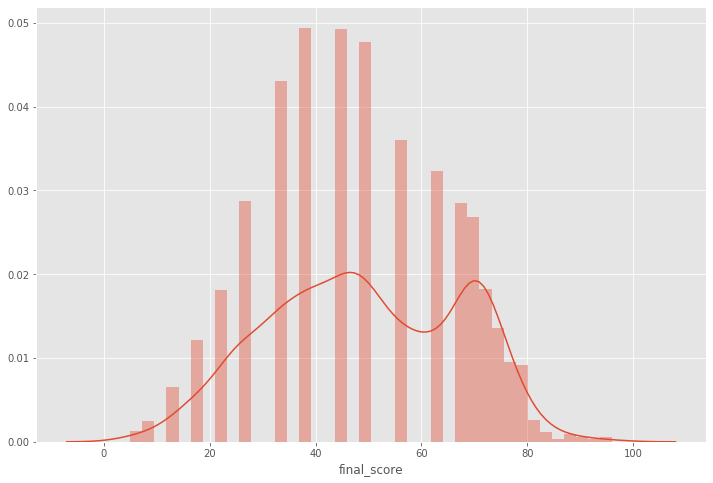

In [74]:
sns.distplot(df.final_score, kde=True, bins=40);

### 8.	Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно». Сделайте графическое представление данного распределения

In [78]:
def mark(row):
    
    '''
    Система оценивания:
    Менее 27 - 'неудовлетворительно';
    От 27 до 60 - 'удовлетворительно';
    От 60 до 80 - 'хорошо';
    От 80 и выше - 'отлично'.
    '''
    
    if row.final_score < 27:
        return 'failed'
    if 27 <= row.final_score < 60:
        return 'ok'
    if 60 <= row.final_score < 80:
        return 'good'
    if row.final_score >= 80:
        return 'excellent'

df['mark'] = df.apply(mark, axis=1)

In [100]:
mark_dist = df.mark.value_counts().reset_index()

In [101]:
mark_dist['mark_percentage'] = round(mark_dist.mark / len(df) * 100, 2)

In [102]:
mark_dist.head()

,index,mark,mark_percentage
0,ok,1363,57.85
1,good,728,30.90
2,failed,217,9.21
3,excellent,48,2.04


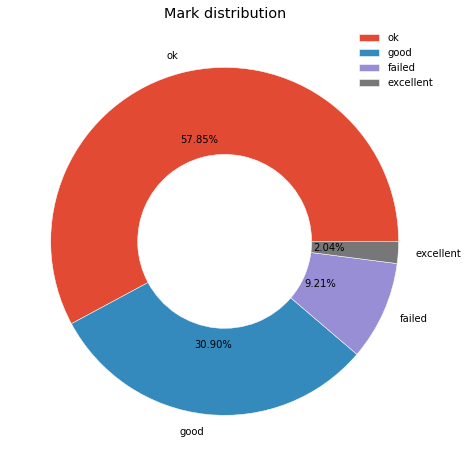

In [94]:
mark_dist.mark_percentage.plot(kind='pie', wedgeprops=dict(width=0.5, edgecolor='w'), autopct='%.2f%%', fontsize=10, labels = ['ok', 'good', 'failed', 'excellent'])
plt.title('Mark distribution')
plt.ylabel('')
plt.legend(labels = ['ok', 'good', 'failed', 'excellent'], framealpha=0)
plt.show()

### 9.	Постройте «ящиковые диаграммы», сравнивающие балы учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно»

In [95]:
from plotly.offline import init_notebook_mode
from plotly.offline import iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [99]:
df.head()

,id,school,form,sex,variant,short_answer,long_answer,1_score,final_score,min_possible_score,status,mark
0,1,124,11,Ж,341,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),1,5,27,failed,failed
1,2,128,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),1,5,27,failed,failed
2,3,132,11,Ж,340,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),1,5,27,failed,failed
3,4,134,11,Ж,339,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),1,5,27,failed,failed
4,5,136,11,Ж,348,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),1,5,27,failed,failed


In [103]:
df.mark.unique()

array(['failed', 'ok', 'good', 'excellent'], dtype=object)

In [104]:
data = []

for mark in df.mark.unique():
    data.append(
        go.Box(y=df[df.mark==mark].final_score, 
               name=mark)
    )
iplot(data, show_link = False)

### 10.	Какое процентное соотношение юношей и девушек писало данный экзамен? Представьте графически.

In [111]:
sex_dist = round(df.sex.value_counts() / len(df) * 100, 2).reset_index()
sex_dist.columns = ['sex', 'sex_percentage']
sex_dist

,sex,sex_percentage
0,Ж,52.84
1,М,47.16


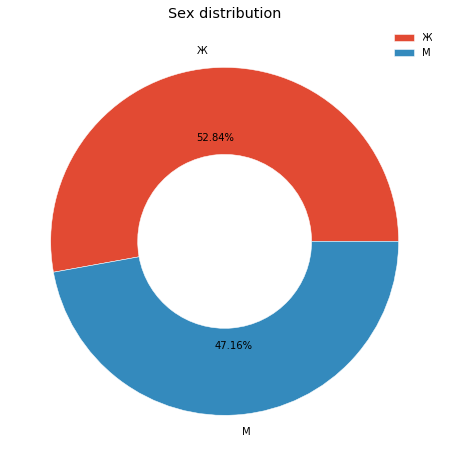

In [112]:
sex_dist.sex_percentage.plot(kind='pie', wedgeprops=dict(width=0.5, edgecolor='w'), autopct='%.2f%%', fontsize=10, labels = ['Ж', 'М'])
plt.title('Sex distribution')
plt.ylabel('')
plt.legend(labels = ['Ж', 'М'], framealpha=0)
plt.show()

### 11.	Постройте диаграмму рассеивания, позволяющую увидеть средние баллы девушек и юношей

In [181]:
df.groupby('sex').final_score.describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Ж,1245.0,48.719679,17.409462,5.0,33.0,50.0,62.0,96.0
М,1111.0,49.855086,18.383200,5.0,39.0,50.0,68.0,96.0


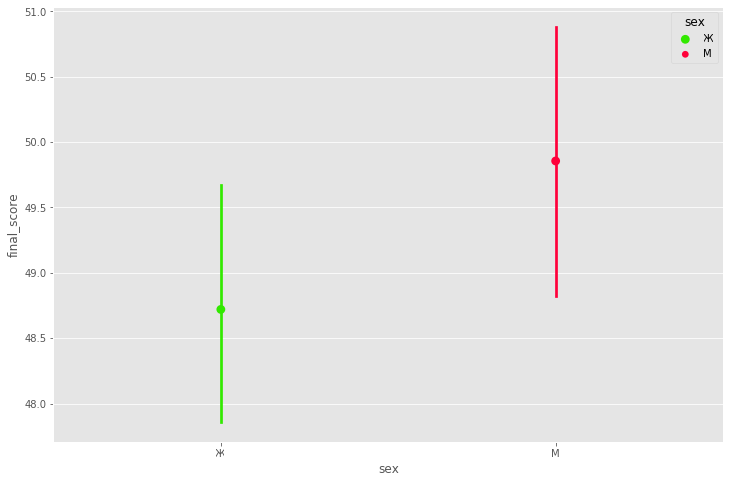

In [140]:
sns.pointplot(x='sex', y='final_score', hue = 'sex', data = df, palette = 'prism');

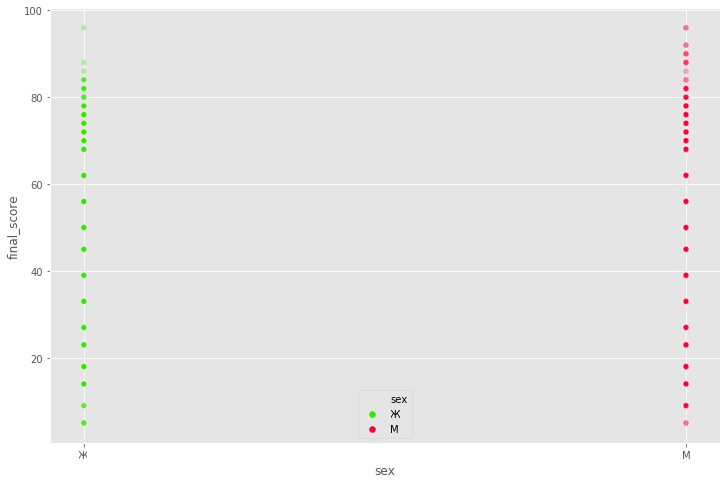

In [165]:
sns.scatterplot(x='sex', y='final_score', hue = 'sex', data = df, palette = 'prism', alpha=0.3);

In [183]:
data = []

for sex in df.sex.unique():
    data.append(
        go.Box(y=df[df.sex==sex].final_score, 
               name=sex))
    
iplot(data, show_link = False)

### 12.	Сколько школ (код ППЕ) принимало участие в экзамене?

In [154]:
len(df.school.unique())

17

In [152]:
df.school.value_counts()

136    1020
135     182
127     176
133     115
128     113
123     111
132     104
137      88
121      81
125      77
126      71
122      54
131      50
124      35
129      33
130      26
134      20
Name: school, dtype: int64

### 13.	Постройте диаграмму, позволяющую сравнить средние баллы за экзамен по школам. Если какие-нибудь выбросы?

In [178]:
data = []

for school in df.school.unique():
    data.append(
        go.Box(y=df[df.school==school].final_score, 
               name=str(school))
    )
iplot(data, show_link = False)

Есть выбросы в 122 и 128 школах

# Повышенной сложности:

### 1.	Сколько всего заданий с кратким ответом? С развернутым ответом?

In [189]:
print('Заданий с кратким ответом: {}'.format(len(df.loc[0, 'short_answer'])))
print('Заданий с развернутым ответом: {}'.format(df.loc[0, 'long_answer'].count('(')))

Заданий с кратким ответом: 12
Заданий с развернутым ответом: 7


### 2.	Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В1 … Вк  Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В. Постройте гистограмму, позволяющую увидеть данное распределение. Какие есть выпады по данному распределению?

In [190]:
print('Всего по экзамену вопросов класса В: {}'.format(len(df.loc[0, 'short_answer'])))

Всего по экзамену вопросов класса В: 12


In [293]:
def b_task1(row):
    result1 = []
    for i in range(0, len(row)):
        result1.append(row.short_answer[i][0])
    
    return result1

def b_task2(row):
    result2 = []
    for i in range(0, len(row)):
        result2.append(row.short_answer[i][1])
    
    return result2

def b_task3(row):
    result3 = []
    for i in range(0, len(row)):
        result3.append(row.short_answer[i][2])
    
    return result3

def b_task4(row):
    result4 = []
    for i in range(0, len(row)):
        result4.append(row.short_answer[i][3])
    
    return result4

def b_task5(row):
    result5 = []
    for i in range(0, len(row)):
        result5.append(row.short_answer[i][4])
    
    return result5

def b_task6(row):
    result6 = []
    for i in range(0, len(row)):
        result6.append(row.short_answer[i][5])
    
    return result6

def b_task7(row):
    result7 = []
    for i in range(0, len(row)):
        result7.append(row.short_answer[i][6])
    
    return result7

def b_task8(row):
    result8 = []
    for i in range(0, len(row)):
        result8.append(row.short_answer[i][7])
    
    return result8

def b_task9(row):
    result9 = []
    for i in range(0, len(row)):
        result9.append(row.short_answer[i][8])
    
    return result9

def b_task10(row):
    result10 = []
    for i in range(0, len(row)):
        result10.append(row.short_answer[i][9])
    
    return result10

def b_task11(row):
    result11 = []
    for i in range(0, len(row)):
        result11.append(row.short_answer[i][10])
    
    return result11

def b_task12(row):
    result12 = []
    for i in range(0, len(row)):
        result12.append(row.short_answer[i][11])
    
    return result12

In [294]:
df['B1'] = b_task1(df)
df['B2'] = b_task2(df)
df['B3'] = b_task3(df)
df['B4'] = b_task4(df)
df['B5'] = b_task5(df)
df['B6'] = b_task6(df)
df['B7'] = b_task7(df)
df['B8'] = b_task8(df)
df['B9'] = b_task9(df)
df['B10'] = b_task10(df)
df['B11'] = b_task11(df)
df['B12'] = b_task12(df)

In [271]:
df.columns

Index(['id', 'school', 'form', 'sex', 'variant', 'short_answer', 'long_answer',
       '1_score', 'final_score', 'min_possible_score', 'status', 'mark', 'B2',
       'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B1'],
      dtype='object')

In [272]:
df[['short_answer', 'B1', 'B2',
       'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12']]

,short_answer,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12
0,------+-----,-,-,-,-,-,-,+,-,-,-,-,-
1,-+----------,-,+,-,-,-,-,-,-,-,-,-,-
2,-+----------,-,+,-,-,-,-,-,-,-,-,-,-
3,-+----------,-,+,-,-,-,-,-,-,-,-,-,-
4,--------+---,-,-,-,-,-,-,-,-,+,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,++++++++++++,+,+,+,+,+,+,+,+,+,+,+,+
2352,++-+++++++++,+,+,-,+,+,+,+,+,+,+,+,+
2353,++++++++++++,+,+,+,+,+,+,+,+,+,+,+,+
2354,++++++++++++,+,+,+,+,+,+,+,+,+,+,+,+


In [277]:
B = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12']

In [306]:
for b in B:
    print('Процент выполненных и не выполненных заданий {}:'.format(b), round(df[b].value_counts() / len(df) * 100, 2))
    print()

Процент выполненных и не выполненных заданий B1: +    89.26
-    10.74
Name: B1, dtype: float64

Процент выполненных и не выполненных заданий B2: +    95.33
-     4.67
Name: B2, dtype: float64

Процент выполненных и не выполненных заданий B3: +    92.78
-     7.22
Name: B3, dtype: float64

Процент выполненных и не выполненных заданий B4: +    91.0
-     9.0
Name: B4, dtype: float64

Процент выполненных и не выполненных заданий B5: +    88.5
-    11.5
Name: B5, dtype: float64

Процент выполненных и не выполненных заданий B6: +    73.17
-    26.83
Name: B6, dtype: float64

Процент выполненных и не выполненных заданий B7: -    62.52
+    37.48
Name: B7, dtype: float64

Процент выполненных и не выполненных заданий B8: -    52.16
+    47.84
Name: B8, dtype: float64

Процент выполненных и не выполненных заданий B9: +    91.85
-     8.15
Name: B9, dtype: float64

Процент выполненных и не выполненных заданий B10: +    71.48
-    28.52
Name: B10, dtype: float64

Процент выполненных и не выполне

In [369]:
b_tasks = []
b_results = []

In [372]:
b_tasks.append(df.groupby('B1').count()['final_score'].agg({'B1': '+'}).reset_index().loc[0][0])
b_tasks.append(df.groupby('B2').count()['final_score'].agg({'B2': '+'}).reset_index().loc[0][0])
b_tasks.append(df.groupby('B3').count()['final_score'].agg({'B3': '+'}).reset_index().loc[0][0])
b_tasks.append(df.groupby('B4').count()['final_score'].agg({'B4': '+'}).reset_index().loc[0][0])
b_tasks.append(df.groupby('B5').count()['final_score'].agg({'B5': '+'}).reset_index().loc[0][0])
b_tasks.append(df.groupby('B6').count()['final_score'].agg({'B6': '+'}).reset_index().loc[0][0])
b_tasks.append(df.groupby('B7').count()['final_score'].agg({'B7': '+'}).reset_index().loc[0][0])
b_tasks.append(df.groupby('B8').count()['final_score'].agg({'B8': '+'}).reset_index().loc[0][0])
b_tasks.append(df.groupby('B9').count()['final_score'].agg({'B9': '+'}).reset_index().loc[0][0])
b_tasks.append(df.groupby('B10').count()['final_score'].agg({'B10': '+'}).reset_index().loc[0][0])
b_tasks.append(df.groupby('B11').count()['final_score'].agg({'B11': '+'}).reset_index().loc[0][0])
b_tasks.append(df.groupby('B12').count()['final_score'].agg({'B12': '+'}).reset_index().loc[0][0])

In [374]:
b_results.append(df.groupby('B1').count()['final_score'].agg({'B1': '+'}).reset_index().loc[0][1])
b_results.append(df.groupby('B2').count()['final_score'].agg({'B2': '+'}).reset_index().loc[0][1])
b_results.append(df.groupby('B3').count()['final_score'].agg({'B3': '+'}).reset_index().loc[0][1])
b_results.append(df.groupby('B4').count()['final_score'].agg({'B4': '+'}).reset_index().loc[0][1])
b_results.append(df.groupby('B5').count()['final_score'].agg({'B5': '+'}).reset_index().loc[0][1])
b_results.append(df.groupby('B6').count()['final_score'].agg({'B6': '+'}).reset_index().loc[0][1])
b_results.append(df.groupby('B7').count()['final_score'].agg({'B7': '+'}).reset_index().loc[0][1])
b_results.append(df.groupby('B8').count()['final_score'].agg({'B8': '+'}).reset_index().loc[0][1])
b_results.append(df.groupby('B9').count()['final_score'].agg({'B9': '+'}).reset_index().loc[0][1])
b_results.append(df.groupby('B10').count()['final_score'].agg({'B10': '+'}).reset_index().loc[0][1])
b_results.append(df.groupby('B11').count()['final_score'].agg({'B11': '+'}).reset_index().loc[0][1])
b_results.append(df.groupby('B12').count()['final_score'].agg({'B12': '+'}).reset_index().loc[0][1])

In [384]:
df_B = pd.DataFrame()
df_B['b_tasks'] = b_tasks
df_B['b_results'] = b_results
df_B

,b_tasks,b_results
0,B1,2103
1,B2,2246
2,B3,2186
3,B4,2144
4,B5,2085
5,B6,1724
6,B7,883
7,B8,1127
8,B9,2164
9,B10,1684


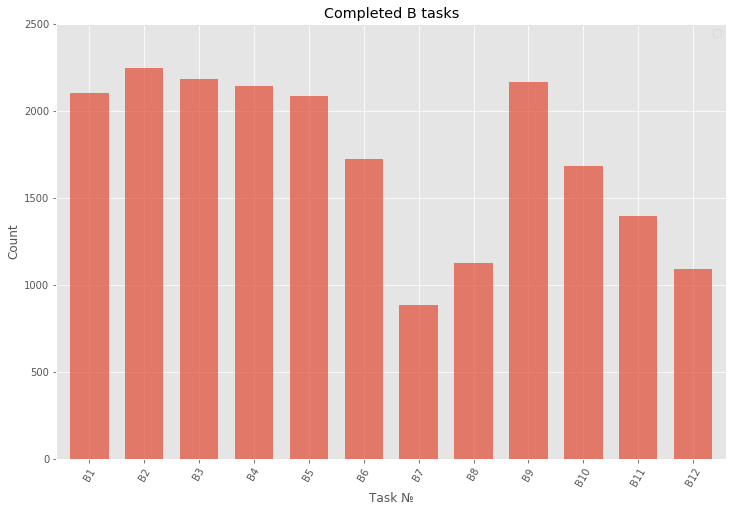

In [490]:
df_B.plot(kind='bar', x='b_tasks', y='b_results', width=0.7, alpha=0.7)
plt.title('Completed B tasks')
plt.ylabel('Count')
plt.xlabel('Task №')
plt.xticks(rotation=60)
plt.ylim([0, 2500])
plt.legend('')
plt.show()

У школьников можно заметить наибольшее количество сложностей с заданиями B7, B8, B12

### 3.	Аналогично и с типом С (ответы с развернутым ответом)

In [388]:
print('Заданий с развернутым ответом: {}'.format(df.loc[0, 'long_answer'].count('(')))

Заданий с развернутым ответом: 7


In [389]:
df.head()

,id,school,form,sex,variant,short_answer,long_answer,1_score,final_score,min_possible_score,...,B4,B5,B6,B7,B8,B9,B10,B11,B12,B1
0,1,124,11,Ж,341,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),1,5,27,...,-,-,-,+,-,-,-,-,-,-
1,2,128,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),1,5,27,...,-,-,-,-,-,-,-,-,-,-
2,3,132,11,Ж,340,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),1,5,27,...,-,-,-,-,-,-,-,-,-,-
3,4,134,11,Ж,339,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),1,5,27,...,-,-,-,-,-,-,-,-,-,-
4,5,136,11,Ж,348,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),1,5,27,...,-,-,-,-,-,+,-,-,-,-


In [399]:
def c_task1(row):
    result1 = []
    for i in range(0, len(row)):
        result1.append(row.long_answer[i][0])
    
    return result1

def c_task2(row):
    result2 = []
    for i in range(0, len(row)):
        result2.append(row.long_answer[i][4])
    
    return result2

def c_task3(row):
    result3 = []
    for i in range(0, len(row)):
        result3.append(row.long_answer[i][8])
    
    return result3

def c_task4(row):
    result4 = []
    for i in range(0, len(row)):
        result4.append(row.long_answer[i][12])
    
    return result4

def c_task5(row):
    result5 = []
    for i in range(0, len(row)):
        result5.append(row.long_answer[i][16])
    
    return result5

def c_task6(row):
    result6 = []
    for i in range(0, len(row)):
        result6.append(row.long_answer[i][20])
    
    return result6

def c_task7(row):
    result7 = []
    for i in range(0, len(row)):
        result7.append(row.long_answer[i][24])
    
    return result7


In [401]:
df['C1'] = c_task1(df)
df['C2'] = c_task2(df)
df['C3'] = c_task3(df)
df['C4'] = c_task4(df)
df['C5'] = c_task5(df)
df['C6'] = c_task6(df)
df['C7'] = c_task7(df)

In [402]:
def c_task1_max(row):
    result1 = []
    for i in range(0, len(row)):
        result1.append(row.long_answer[i][2])
    
    return result1

def c_task2_max(row):
    result2 = []
    for i in range(0, len(row)):
        result2.append(row.long_answer[i][6])
    
    return result2

def c_task3_max(row):
    result3 = []
    for i in range(0, len(row)):
        result3.append(row.long_answer[i][10])
    
    return result3

def c_task4_max(row):
    result4 = []
    for i in range(0, len(row)):
        result4.append(row.long_answer[i][14])
    
    return result4

def c_task5_max(row):
    result5 = []
    for i in range(0, len(row)):
        result5.append(row.long_answer[i][18])
    
    return result5

def c_task6_max(row):
    result6 = []
    for i in range(0, len(row)):
        result6.append(row.long_answer[i][22])
    
    return result6

def c_task7_max(row):
    result7 = []
    for i in range(0, len(row)):
        result7.append(row.long_answer[i][26])
    
    return result7


In [403]:
df['C1_max'] = c_task1_max(df)
df['C2_max'] = c_task2_max(df)
df['C3_max'] = c_task3_max(df)
df['C4_max'] = c_task4_max(df)
df['C5_max'] = c_task5_max(df)
df['C6_max'] = c_task6_max(df)
df['C7_max'] = c_task7_max(df)

In [411]:
df[['long_answer',
'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C1_max',
 'C2_max',
 'C3_max',
 'C4_max',
 'C5_max',
 'C6_max',
 'C7_max']].tail()

,long_answer,C1,C2,C3,C4,C5,C6,C7,C1_max,C2_max,C3_max,C4_max,C5_max,C6_max,C7_max
2351,2(2)2(2)2(2)3(3)3(3)0(4)1(4),2,2,2,3,3,0,1,2,2,2,3,3,4,4
2352,2(2)2(2)1(2)2(3)2(3)4(4)1(4),2,2,1,2,2,4,1,2,2,2,3,3,4,4
2353,2(2)1(2)2(2)1(3)3(3)4(4)2(4),2,1,2,1,3,4,2,2,2,2,3,3,4,4
2354,2(2)2(2)2(2)0(3)3(3)4(4)2(4),2,2,2,0,3,4,2,2,2,2,3,3,4,4
2355,2(2)2(2)2(2)0(3)3(3)4(4)2(4),2,2,2,0,3,4,2,2,2,2,3,3,4,4


In [417]:
obj_types = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C1_max', 'C2_max', 'C3_max',
       'C4_max', 'C5_max', 'C6_max', 'C7_max']
for col in obj_types:
    df[col] = df[col].astype(int)

In [418]:
df['C1_completion_perc'] = df['C1'] / df['C1_max'] 
df['C2_completion_perc'] = df['C2'] / df['C2_max'] 
df['C3_completion_perc'] = df['C3'] / df['C3_max'] 
df['C4_completion_perc'] = df['C4'] / df['C4_max']
df['C5_completion_perc'] = df['C5'] / df['C5_max'] 
df['C6_completion_perc'] = df['C6'] / df['C6_max'] 
df['C7_completion_perc'] = df['C7'] / df['C7_max']

In [428]:
df.columns

Index(['id', 'school', 'form', 'sex', 'variant', 'short_answer', 'long_answer',
       '1_score', 'final_score', 'min_possible_score', 'status', 'mark', 'B2',
       'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B1',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C1_max', 'C2_max', 'C3_max',
       'C4_max', 'C5_max', 'C6_max', 'C7_max', 'C1_completion_perc',
       'C2_completion_perc', 'C3_completion_perc', 'C4_completion_perc',
       'C5_completion_perc', 'C6_completion_perc', 'C7_completion_perc'],
      dtype='object')

In [444]:
C_t =['C1_completion_perc',
       'C2_completion_perc', 'C3_completion_perc', 'C4_completion_perc',
       'C5_completion_perc', 'C6_completion_perc', 'C7_completion_perc']
for g in C_t:
    print('Cредний процент полного выполнения задания {}:'.format(g[0:2]), round(df[g].mean() * 100, 2), '%')
    print()

Cредний процент полного выполнения задания C1: 30.03 %

Cредний процент полного выполнения задания C2: 11.67 %

Cредний процент полного выполнения задания C3: 14.07 %

Cредний процент полного выполнения задания C4: 1.29 %

Cредний процент полного выполнения задания C5: 1.97 %

Cредний процент полного выполнения задания C6: 0.63 %

Cредний процент полного выполнения задания C7: 1.1 %



In [450]:
C = [ 'C1_max','C2_max','C3_max','C4_max','C5_max','C6_max','C7_max']
for g in C:
    print('Cреднее количество баллов за задание {}:'.format(g[0:2]), round(df[g[0:2]].mean(), 2), 'из {}'.format(df.loc[0, g]))
    print()

Cреднее количество баллов за задание C1: 0.6 из 2

Cреднее количество баллов за задание C2: 0.23 из 2

Cреднее количество баллов за задание C3: 0.28 из 2

Cреднее количество баллов за задание C4: 0.04 из 3

Cреднее количество баллов за задание C5: 0.06 из 3

Cреднее количество баллов за задание C6: 0.03 из 4

Cреднее количество баллов за задание C7: 0.04 из 4



In [455]:
df_c_task = []
df_c_meanscore = []
df_c_maxscore =[]
df_c_fulltaskcompletion = []
for g in C:
    df_c_task.append(g[0:2])
    df_c_meanscore.append(round(df[g[0:2]].mean(), 2))
    df_c_maxscore.append(df.loc[0, g])
for g in C_t:
    df_c_fulltaskcompletion.append(round(df[g].mean() * 100, 2))

In [456]:
df_C = pd.DataFrame()
df_C['Task'] = df_c_task
df_C['Mean Score'] = df_c_meanscore
df_C['Max Score'] = df_c_maxscore
df_C['Full Task Completion'] = df_c_fulltaskcompletion
df_C

,Task,Mean Score,Max Score,Full Task Completion
0,C1,0.60,2,30.03
1,C2,0.23,2,11.67
2,C3,0.28,2,14.07
3,C4,0.04,3,1.29
4,C5,0.06,3,1.97
5,C6,0.03,4,0.63
6,C7,0.04,4,1.10


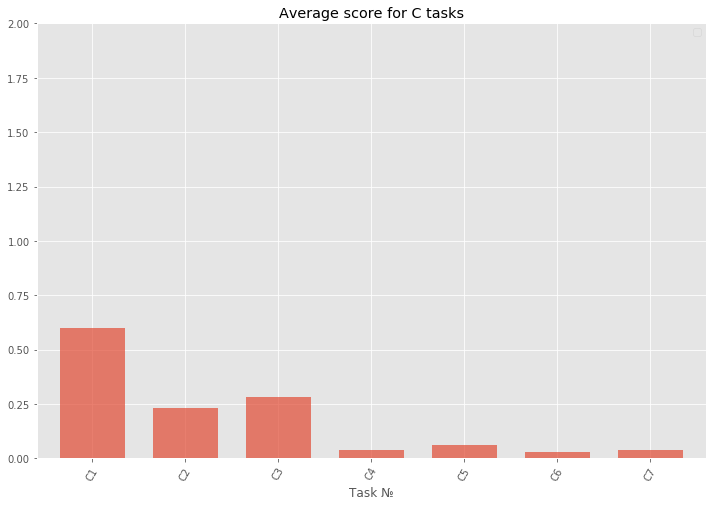

In [489]:
df_C.plot(kind='bar', x='Task', y='Mean Score', width=0.7, alpha=0.7)
plt.title('Average score for C tasks')
plt.ylabel('')
plt.xlabel('Task №')
plt.xticks(rotation=60)
plt.ylim([0, 2])
plt.legend('')
plt.show()

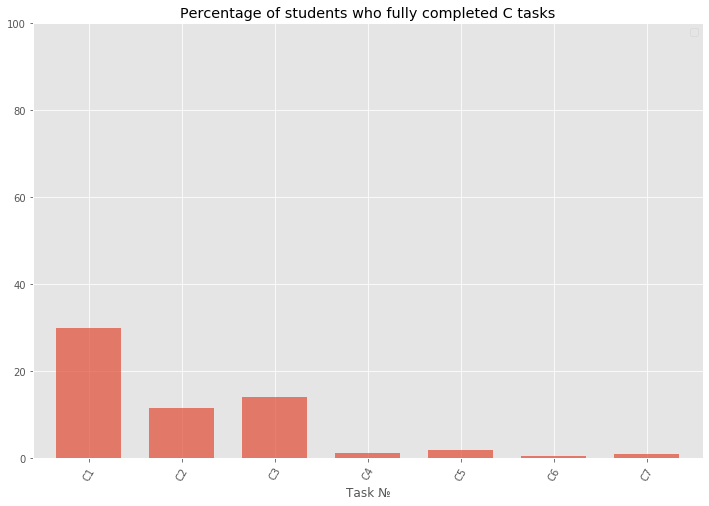

In [482]:
df_C.plot(kind='bar', x='Task', y='Full Task Completion', width=0.7, alpha=0.7)
plt.title('Percentage of students who fully completed C tasks')
plt.ylabel('')
plt.xlabel('Task №')
plt.ylim([0, 100])
plt.xticks(rotation=60)
plt.legend('')
plt.show()

### 4.	Сделайте анализ по двум школам:
#### А) по всем выполненным заданиям типа В
#### Б) по заданиям типа С больше 50%
#### В) по среднему балу юношей и девушек


In [495]:
df.school.value_counts()

136    1020
135     182
127     176
133     115
128     113
123     111
132     104
137      88
121      81
125      77
126      71
122      54
131      50
124      35
129      33
130      26
134      20
Name: school, dtype: int64

Возьмем школы 135 и 127 - они примерно одинаковы по количеству

In [632]:
data = df[(df.school == 127) | (df.school == 135)]

In [633]:
data.sample(5)

,id,school,form,sex,variant,short_answer,long_answer,1_score,final_score,min_possible_score,...,C5_max,C6_max,C7_max,C1_completion_perc,C2_completion_perc,C3_completion_perc,C4_completion_perc,C5_completion_perc,C6_completion_perc,C7_completion_perc
1273,1274,135,11,М,347,++++++-++++-,0(2)0(2)0(2)0(3)0(3)0(4)0(4),10,50,27,...,3,4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251,252,127,11,Ж,347,+++++---+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),6,27,27,...,3,4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2156,2157,127,11,Ж,347,++++++--++++,2(2)2(2)2(2)0(3)0(3)0(4)0(4),16,74,27,...,3,4,4,1.0,1.0,1.0,0.0,0.0,0.0,0.0
433,434,127,11,Ж,340,--++++--+++-,0(2)0(2)0(2)0(3)0(3)0(4)0(4),7,33,27,...,3,4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2309,2310,135,11,М,337,+++++++-++++,2(2)2(2)2(2)0(3)0(3)0(4)2(4),19,80,27,...,3,4,4,1.0,1.0,1.0,0.0,0.0,0.0,0.5


In [634]:
data.columns

Index(['id', 'school', 'form', 'sex', 'variant', 'short_answer', 'long_answer',
       '1_score', 'final_score', 'min_possible_score', 'status', 'mark', 'B2',
       'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B1',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C1_max', 'C2_max', 'C3_max',
       'C4_max', 'C5_max', 'C6_max', 'C7_max', 'C1_completion_perc',
       'C2_completion_perc', 'C3_completion_perc', 'C4_completion_perc',
       'C5_completion_perc', 'C6_completion_perc', 'C7_completion_perc'],
      dtype='object')

In [635]:
data = data[['id', 'school', 'sex', 'short_answer', 'long_answer',
       '1_score', 'final_score', 'B1', 'B2',
       'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C1_max', 'C2_max', 'C3_max',
       'C4_max', 'C5_max', 'C6_max', 'C7_max', 'C1_completion_perc',
       'C2_completion_perc', 'C3_completion_perc', 'C4_completion_perc',
       'C5_completion_perc', 'C6_completion_perc', 'C7_completion_perc']]

In [636]:
data['C_score'] = data.C1 + data.C2 + data.C3 + data.C4 + data.C5 + data.C6 + data.C7
data['C_max_score'] = data.C1_max + data.C2_max + data.C3_max + data.C4_max + data.C5_max + data.C6_max + data.C7_max 

#### А) по всем выполненным заданиям типа В

In [516]:
data

,id,school,sex,short_answer,long_answer,1_score,final_score,B1,B2,B3,...,C7,C1_max,C2_max,C3_max,C4_max,C5_max,C6_max,C7_max,C_score,C_max_score
8,9,127,М,+-----+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),2,9,+,-,-,...,0,2,2,2,3,3,4,4,0,20
9,10,127,Ж,-+-+--------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),2,9,-,+,-,...,0,2,2,2,3,3,4,4,0,20
15,16,135,М,++----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),2,9,+,+,-,...,0,2,2,2,3,3,4,4,0,20
25,26,127,Ж,-+-+----+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),3,14,-,+,-,...,0,2,2,2,3,3,4,4,0,20
39,40,135,М,-+-++-------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),3,14,-,+,-,...,0,2,2,2,3,3,4,4,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2281,2282,127,М,++++++++++++,2(2)2(2)2(2)0(3)0(3)0(4)0(4),18,78,+,+,+,...,0,2,2,2,3,3,4,4,6,20
2284,2285,135,Ж,+++++++-++++,2(2)2(2)2(2)0(3)1(3)0(4)0(4),18,78,+,+,+,...,0,2,2,2,3,3,4,4,7,20
2309,2310,135,М,+++++++-++++,2(2)2(2)2(2)0(3)0(3)0(4)2(4),19,80,+,+,+,...,2,2,2,2,3,3,4,4,8,20
2322,2323,127,М,++++++++++++,2(2)2(2)2(2)0(3)0(3)2(4)0(4),20,82,+,+,+,...,0,2,2,2,3,3,4,4,8,20


In [509]:
data.columns

Index(['id', 'school', 'sex', 'short_answer', 'long_answer', '1_score',
       'final_score', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9',
       'B10', 'B11', 'B12', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C1_max',
       'C2_max', 'C3_max', 'C4_max', 'C5_max', 'C6_max', 'C7_max', 'C_score',
       'C_max_score'],
      dtype='object')

In [517]:
data_B = data[['school', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9',
       'B10', 'B11', 'B12']]

In [518]:
data_B.head()

,school,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12
8,127,+,-,-,-,-,-,+,-,-,-,-,-
9,127,-,+,-,+,-,-,-,-,-,-,-,-
15,135,+,+,-,-,-,-,-,-,-,-,-,-
25,127,-,+,-,+,-,-,-,-,+,-,-,-
39,135,-,+,-,+,+,-,-,-,-,-,-,-


In [522]:
cols = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9',
       'B10', 'B11', 'B12']
for col in cols:
    data_B[col] = data_B[col].map({'+': 1, '-': 0})

C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [531]:
data_B.head()

,school,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12
8,127,1,0,0,0,0,0,1,0,0,0,0,0
9,127,0,1,0,1,0,0,0,0,0,0,0,0
15,135,1,1,0,0,0,0,0,0,0,0,0,0
25,127,0,1,0,1,0,0,0,0,1,0,0,0
39,135,0,1,0,1,1,0,0,0,0,0,0,0


In [532]:
data_B_grouped.columns

Index(['Task', 'School 127', 'School 135'], dtype='object')

In [545]:
data_B_grouped = data_B.groupby('school').mean()
school127 = pd.Series(data_B_grouped.loc[127].reset_index()[127])
school135 = pd.Series(data_B_grouped.loc[135].reset_index()[135])
tasks = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11',
       'B12']

In [613]:
data_B_grouped = pd.DataFrame()
data_B_grouped_2 = pd.DataFrame()
data_B_grouped['Task'] = tasks
data_B_grouped_2['Task'] = tasks
data_B_grouped['Mean Result'] = school127
data_B_grouped_2['Mean Result'] = school135
data_B_grouped['School'] = 127
data_B_grouped_2['School'] = 135
data_b_grouped = pd.concat([data_B_grouped, data_B_grouped_2]).reset_index(drop=True)
data_b_grouped

,Task,Mean Result,School
0,B1,0.897727,127
1,B2,0.943182,127
2,B3,0.937500,127
3,B4,0.948864,127
4,B5,0.880682,127
5,B6,0.767045,127
6,B7,0.380682,127
7,B8,0.443182,127
8,B9,0.948864,127
9,B10,0.772727,127


In [614]:
data_b_grouped.groupby('Task')
data_b_grouped.set_index(['Task', 'School'], inplace=True)
data_b_grouped.sort_index(inplace=True)
data_b_grouped.reset_index(inplace=True)

In [695]:
data_b_grouped

,Task,School,Mean Result
0,B1,127,0.897727
1,B1,135,0.884615
2,B10,127,0.772727
3,B10,135,0.725275
4,B11,127,0.630682
5,B11,135,0.549451
6,B12,127,0.488636
7,B12,135,0.428571
8,B2,127,0.943182
9,B2,135,0.961538


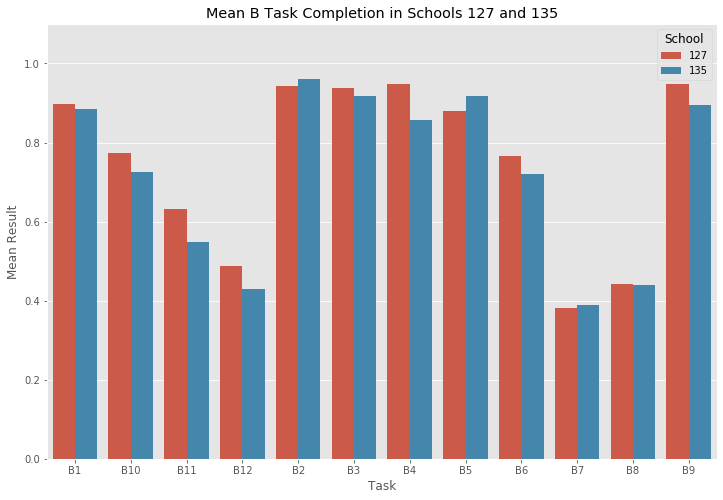

In [618]:
sns.barplot( data = data_b_grouped,  y='Mean Result', x='Task', hue='School')
plt.ylim([0, 1.1])
plt.title('Mean B Task Completion in Schools 127 and 135');

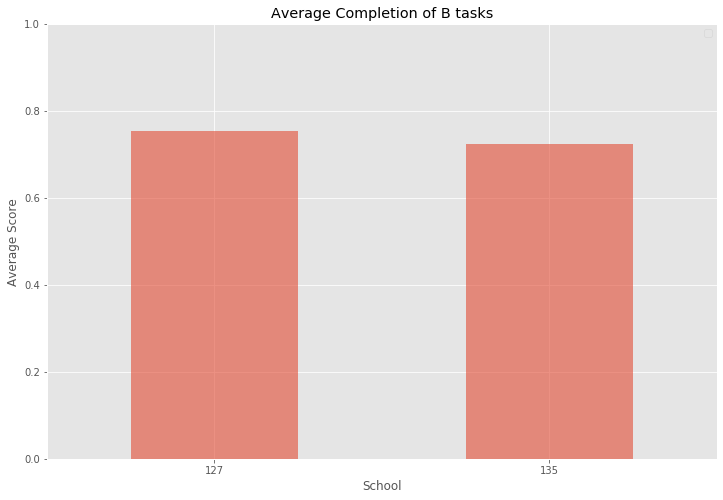

In [625]:
data_b_grouped.groupby('School').mean()['Mean Result'].plot(kind='bar', alpha=0.6)
plt.title('Average Completion of B tasks')
plt.ylabel('Average Score')
plt.ylim([0, 1])
plt.xticks(rotation=0)
plt.legend('');

В целом две школы показали очень похожие результаты, с незначительными отклонениями в результатах друг от друга, в среднем ученики школы 135 справилась с экзаменом по математике чуть хуже

#### Б) по заданиям типа С больше 50%

??? только одно значение

In [649]:
data[data.C_score >= 10]

,id,school,sex,short_answer,long_answer,1_score,final_score,B1,B2,B3,...,C7_max,C1_completion_perc,C2_completion_perc,C3_completion_perc,C4_completion_perc,C5_completion_perc,C6_completion_perc,C7_completion_perc,C_score,C_max_score
2341,2342,127,М,++++++++++++,2(2)2(2)2(2)0(3)0(3)4(4)0(4),22,86,+,+,+,...,4,1.0,1.0,1.0,0.0,0.0,1.0,0.0,10,20


In [671]:
data_C = data[(data.C1_completion_perc >=0.5) | (data.C2_completion_perc >=0.5) | (data.C3_completion_perc >=0.5) | (data.C4_completion_perc >=0.5) | (data.C5_completion_perc >=0.5) | (data.C6_completion_perc >=0.5) | (data.C7_completion_perc >=0.5)]

In [672]:
data_C.columns

Index(['id', 'school', 'sex', 'short_answer', 'long_answer', '1_score',
       'final_score', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9',
       'B10', 'B11', 'B12', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C1_max',
       'C2_max', 'C3_max', 'C4_max', 'C5_max', 'C6_max', 'C7_max',
       'C1_completion_perc', 'C2_completion_perc', 'C3_completion_perc',
       'C4_completion_perc', 'C5_completion_perc', 'C6_completion_perc',
       'C7_completion_perc', 'C_score', 'C_max_score'],
      dtype='object')

In [673]:
data_C = data_C[['id', 'school', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C1_max',
       'C2_max', 'C3_max', 'C4_max', 'C5_max', 'C6_max', 'C7_max',
       'C1_completion_perc', 'C2_completion_perc', 'C3_completion_perc',
       'C4_completion_perc', 'C5_completion_perc', 'C6_completion_perc',
       'C7_completion_perc', 'C_score', 'C_max_score']]

In [674]:
data_C.loc[data_C.C1_completion_perc < 0.5, 'C1_completion_perc'] = np.NaN
data_C.loc[data_C.C2_completion_perc < 0.5, 'C2_completion_perc'] = np.NaN
data_C.loc[data_C.C3_completion_perc < 0.5, 'C3_completion_perc'] = np.NaN
data_C.loc[data_C.C4_completion_perc < 0.5, 'C4_completion_perc'] = np.NaN
data_C.loc[data_C.C5_completion_perc < 0.5, 'C5_completion_perc'] = np.NaN
data_C.loc[data_C.C6_completion_perc < 0.5, 'C6_completion_perc'] = np.NaN
data_C.loc[data_C.C7_completion_perc < 0.5, 'C7_completion_perc'] = np.NaN

In [675]:
data_C.sample(20)

,id,school,C1,C2,C3,C4,C5,C6,C7,C1_max,...,C7_max,C1_completion_perc,C2_completion_perc,C3_completion_perc,C4_completion_perc,C5_completion_perc,C6_completion_perc,C7_completion_perc,C_score,C_max_score
2154,2155,127,2,0,2,0,0,0,0,2,...,4,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4,20
1797,1798,127,0,0,2,0,0,0,0,2,...,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2,20
742,743,135,1,0,0,0,0,0,0,2,...,4,0.5,NaN,NaN,NaN,NaN,NaN,NaN,1,20
2073,2074,127,2,0,1,0,0,0,0,2,...,4,1.0,NaN,0.5,NaN,NaN,NaN,NaN,3,20
2087,2088,135,1,2,0,0,0,0,0,2,...,4,0.5,1.0,NaN,NaN,NaN,NaN,NaN,3,20
1796,1797,127,1,1,0,0,0,0,0,2,...,4,0.5,0.5,NaN,NaN,NaN,NaN,NaN,2,20
1964,1965,135,2,0,0,0,0,0,0,2,...,4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2,20
1819,1820,135,2,0,0,0,0,0,0,2,...,4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2,20
1930,1931,127,2,1,0,0,0,0,0,2,...,4,1.0,0.5,NaN,NaN,NaN,NaN,NaN,3,20
2276,2277,127,2,0,2,3,0,0,0,2,...,4,1.0,NaN,1.0,1.0,NaN,NaN,NaN,7,20


In [685]:
data_C.describe()[['C1_completion_perc', 'C2_completion_perc', 'C3_completion_perc',
       'C4_completion_perc', 'C5_completion_perc', 'C6_completion_perc',
       'C7_completion_perc']][0:1]

,C1_completion_perc,C2_completion_perc,C3_completion_perc,C4_completion_perc,C5_completion_perc,C6_completion_perc,C7_completion_perc
count,129.0,56.0,53.0,2.0,2.0,2.0,1.0


In [687]:
data_C_127 = data_C[data_C.school == 127]
data_C_135 = data_C[data_C.school == 135]
data_C_127 = data_C_127.describe()[['C1_completion_perc', 'C2_completion_perc', 'C3_completion_perc',
       'C4_completion_perc', 'C5_completion_perc', 'C6_completion_perc',
       'C7_completion_perc']][0:1]
data_C_135 = data_C_135.describe()[['C1_completion_perc', 'C2_completion_perc', 'C3_completion_perc',
       'C4_completion_perc', 'C5_completion_perc', 'C6_completion_perc',
       'C7_completion_perc']][0:1]
data_C_127['School'] = 127
data_C_135['School'] = 135
data_c = pd.concat([data_C_127, data_C_135])

In [689]:
data_c.columns = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'School']

In [696]:
data_c = data_c.reset_index(drop=True).set_index('School')
for i in data_c:
    data_c[i] = data_c[i].astype(int)

In [697]:
data_c

,C1,C2,C3,C4,C5,C6,C7
School,,,,,,,
127,68,32,36,1,1,2,0
135,61,24,17,1,1,0,1


In [701]:
data_c.loc[127]

C1    68
C2    32
C3    36
C4     1
C5     1
C6     2
C7     0
Name: 127, dtype: int32

In [702]:
tasks = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']
school127 = pd.Series(data_c.loc[127].reset_index()[127])
school135 = pd.Series(data_c.loc[135].reset_index()[135])
data_c_school_127 = pd.DataFrame()
data_c_school_135 = pd.DataFrame()
data_c_school_127['Task'] = tasks
data_c_school_127['Count'] = school127
data_c_school_127['School'] = 127
data_c_school_135['Task'] = tasks
data_c_school_135['Count'] = school135
data_c_school_135['School'] = 135
data_c = pd.concat([data_c_school_127, data_c_school_135])

In [705]:
data_c.sort_values(by='Task', inplace=True)

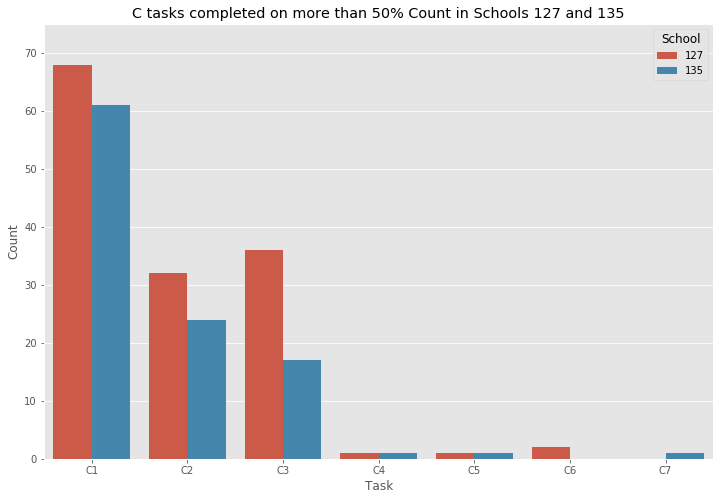

In [708]:
sns.barplot( data = data_c,  y='Count', x='Task', hue='School')
plt.ylim([0, 75])
plt.title('C tasks completed on more than 50% Count in Schools 127 and 135');

In [712]:
df.school.value_counts()[[135, 127]]

135    182
127    176
Name: school, dtype: int64

Из 176 и 182 человек, сдающих экзамен по математике от 127 и 135 школ соответственно, выше мы можем увидеть количество людей, получивших за задания С хотя бы половину возможных баллов.
- Можно заметить, что в принципе в заданиях С1-С3 ученики школы 127 справляются заметно лучше своих конкурентов
- Задания С4-С7 выполняются одинаково плохо, где учеников, выполнивших более половины задания, можно пересчитать по пальцам

#### В) по среднему балу юношей и девушек

In [713]:
data.columns

Index(['id', 'school', 'sex', 'short_answer', 'long_answer', '1_score',
       'final_score', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9',
       'B10', 'B11', 'B12', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C1_max',
       'C2_max', 'C3_max', 'C4_max', 'C5_max', 'C6_max', 'C7_max',
       'C1_completion_perc', 'C2_completion_perc', 'C3_completion_perc',
       'C4_completion_perc', 'C5_completion_perc', 'C6_completion_perc',
       'C7_completion_perc', 'C_score', 'C_max_score'],
      dtype='object')

In [714]:
data_scores = data[['school', 'sex',
       'final_score']]

In [720]:
data_sex = data_scores.groupby(['school', 'sex']).mean().reset_index(drop=False).sort_values(by='sex')

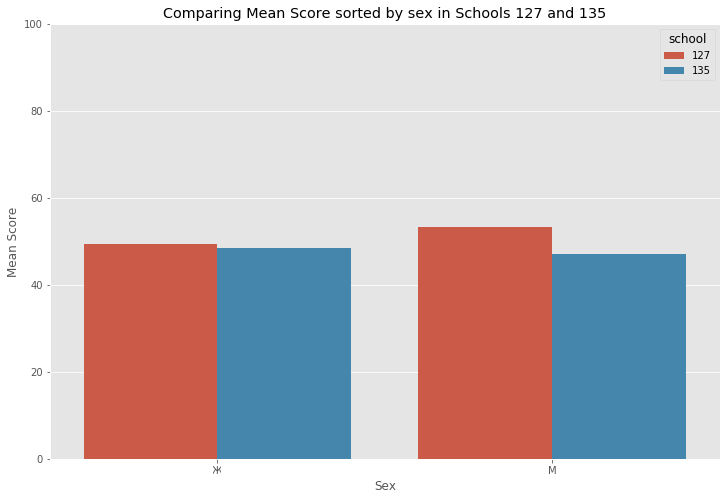

In [724]:
sns.barplot( data = data_sex,  y='final_score', x='sex', hue='school')
plt.ylim([0, 100])
plt.ylabel('Mean Score')
plt.xlabel('Sex')
plt.title('Comparing Mean Score sorted by sex in Schools 127 and 135');

Значительный вклад в средний результат своей школы принесли мальчики школы 127, можно заметить достаточно сильный отрыв от учеников школы 135. В то же время учащиеся женского пола данных школ показали примерно одинаковые средние результаты. Также можно добавить, что девочки школы 135 показали средний результат лучше мальчиков своей школы

*Благодарю за внимание!*